<a href="https://colab.research.google.com/github/Sabarishsusiraj/table_extract/blob/main/table_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 15.2 MB/s 
     |████████████████████████████████| 145 kB 65.1 MB/s 
     |████████████████████████████████| 619 kB 66.2 MB/s 
     |████████████████████████████████| 47.6 MB 1.8 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [ ]:
import easyocr
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
reader = easyocr.Reader(['en'])

In [ ]:
def check_table(word_seq):
    print("@@")
    words=word_seq["vals"]
    length_of_word_seq=len(words)
    print(length_of_word_seq)
    col_nos=word_seq["col_nos"]
    #print("col_nos:::",col_nos)
    row_nos=word_seq["row_nos"]
    #print("row_nos:::",row_nos)
    for ind in range(row_nos):
        row_1=[]
        for i in range(ind,length_of_word_seq,col_nos):
            print(i)
            print(word_seq["vals"][i])
            row_1.append(word_seq["vals"][i])
            val1=row_1[0][0][0][0]
            val2=row_1[0][0][1][0]
            status=False
            for j in row_1:
                if (val2+100)>=j[0][0][0]>=(val1-100):
                    status=True
                else:
                    words=(words[:-col_nos])
    word_seq["vals"]=words
    return word_seq

In [ ]:
def extract_and_save_tables(tables):
  tab=[]
  for x in tables:
    val={}
    for i in x:
        for j in range(i[0][0][1]-50,i[0][0][1]+50):
            if j not in val.keys():
              present=False
            elif j in val.keys():
              present=True
              break
        if present==False:
          val[i[0][0][1]]=[i[1]]
        if present==True:
          val[j].append(i[1])
    tab.append(val)
  n=0
  for v in tab:
    rows=[]
    fname=str(n)
    for i in v.values():
      rows.append(i)
    rows=np.array(rows)
    df=pd.DataFrame(rows)
    df.columns = df.iloc[0]
    df = df[1:]
    print(df)
    df.to_csv(f"out_table_{fname}.csv")
    print(n)
    n=n+1
  return tab

In [ ]:
def get_tables(img_path):
  img=cv2.imread(img_path)
  img = cv2.resize(img,(img.shape[1]*2,img.shape[0]*2))
  cv2_imshow(img)
  result = reader.readtext(img)
  tables=[]
  i=0
  while i<len(result)-1:
      print("i1:",i)
      word_seq={"vals":[],"row_nos":0}
      samp_1=img[result[i][0][0][1]:result[i][0][3][1],result[i][0][0][0]::]
      cv2_imshow(samp_1)
      result_1 = reader.readtext(samp_1)
      if len(result_1)>1:
          #print(":::::")
          for k in range(i,i+len(result_1)):
              #print(":::")
              word_seq["vals"].append(result[k])
          word_seq["col_nos"]=(len(result_1))
          #word_seq["row_nos"]=1
          r=1
          for j in range(i+len(result_1),len(result),len(result_1)):
              #print("###")
              samp_2=img[result[j][0][0][1]:result[j][0][3][1],result[j][0][0][0]::]
              result_2 = reader.readtext(samp_2)
              #print(result_2)
              #print(len(result_2))
              if len(result_2)==len(result_1):
                  r=r+1
                  #print(word_seq["row_nos"])
                  #print(type(word_seq))
                  #print(type(word_seq["row_nos"]))
                  word_seq["row_nos"]=r
                  print(word_seq)
                  for l in range(j,j+len(result_2)):
                      word_seq["vals"].append(result[l])
                  print(word_seq)
                  prev_length=len(word_seq)
                  word_seq=check_table(word_seq)
                  post_length=len(word_seq)
                  if post_length<prev_length:
                    break
                  print(word_seq)
                  print(len(word_seq))
              elif len(result_2)!=len(result_1):
                  break
          if len(word_seq["vals"])>len(result_1):
              tables.append(word_seq["vals"])
              i=i+len(word_seq["vals"])
              print("i2:",i)
          else:
            i=i+1
      elif len(result_1)==1:
          i=i+1
          print("i2:",i)
  tab=extract_and_save_tables(tables)
  return tab

In [ ]:
t=get_tables("/content/invoice.png")

In [ ]:
t1=get_tables("/content/table_2.png")

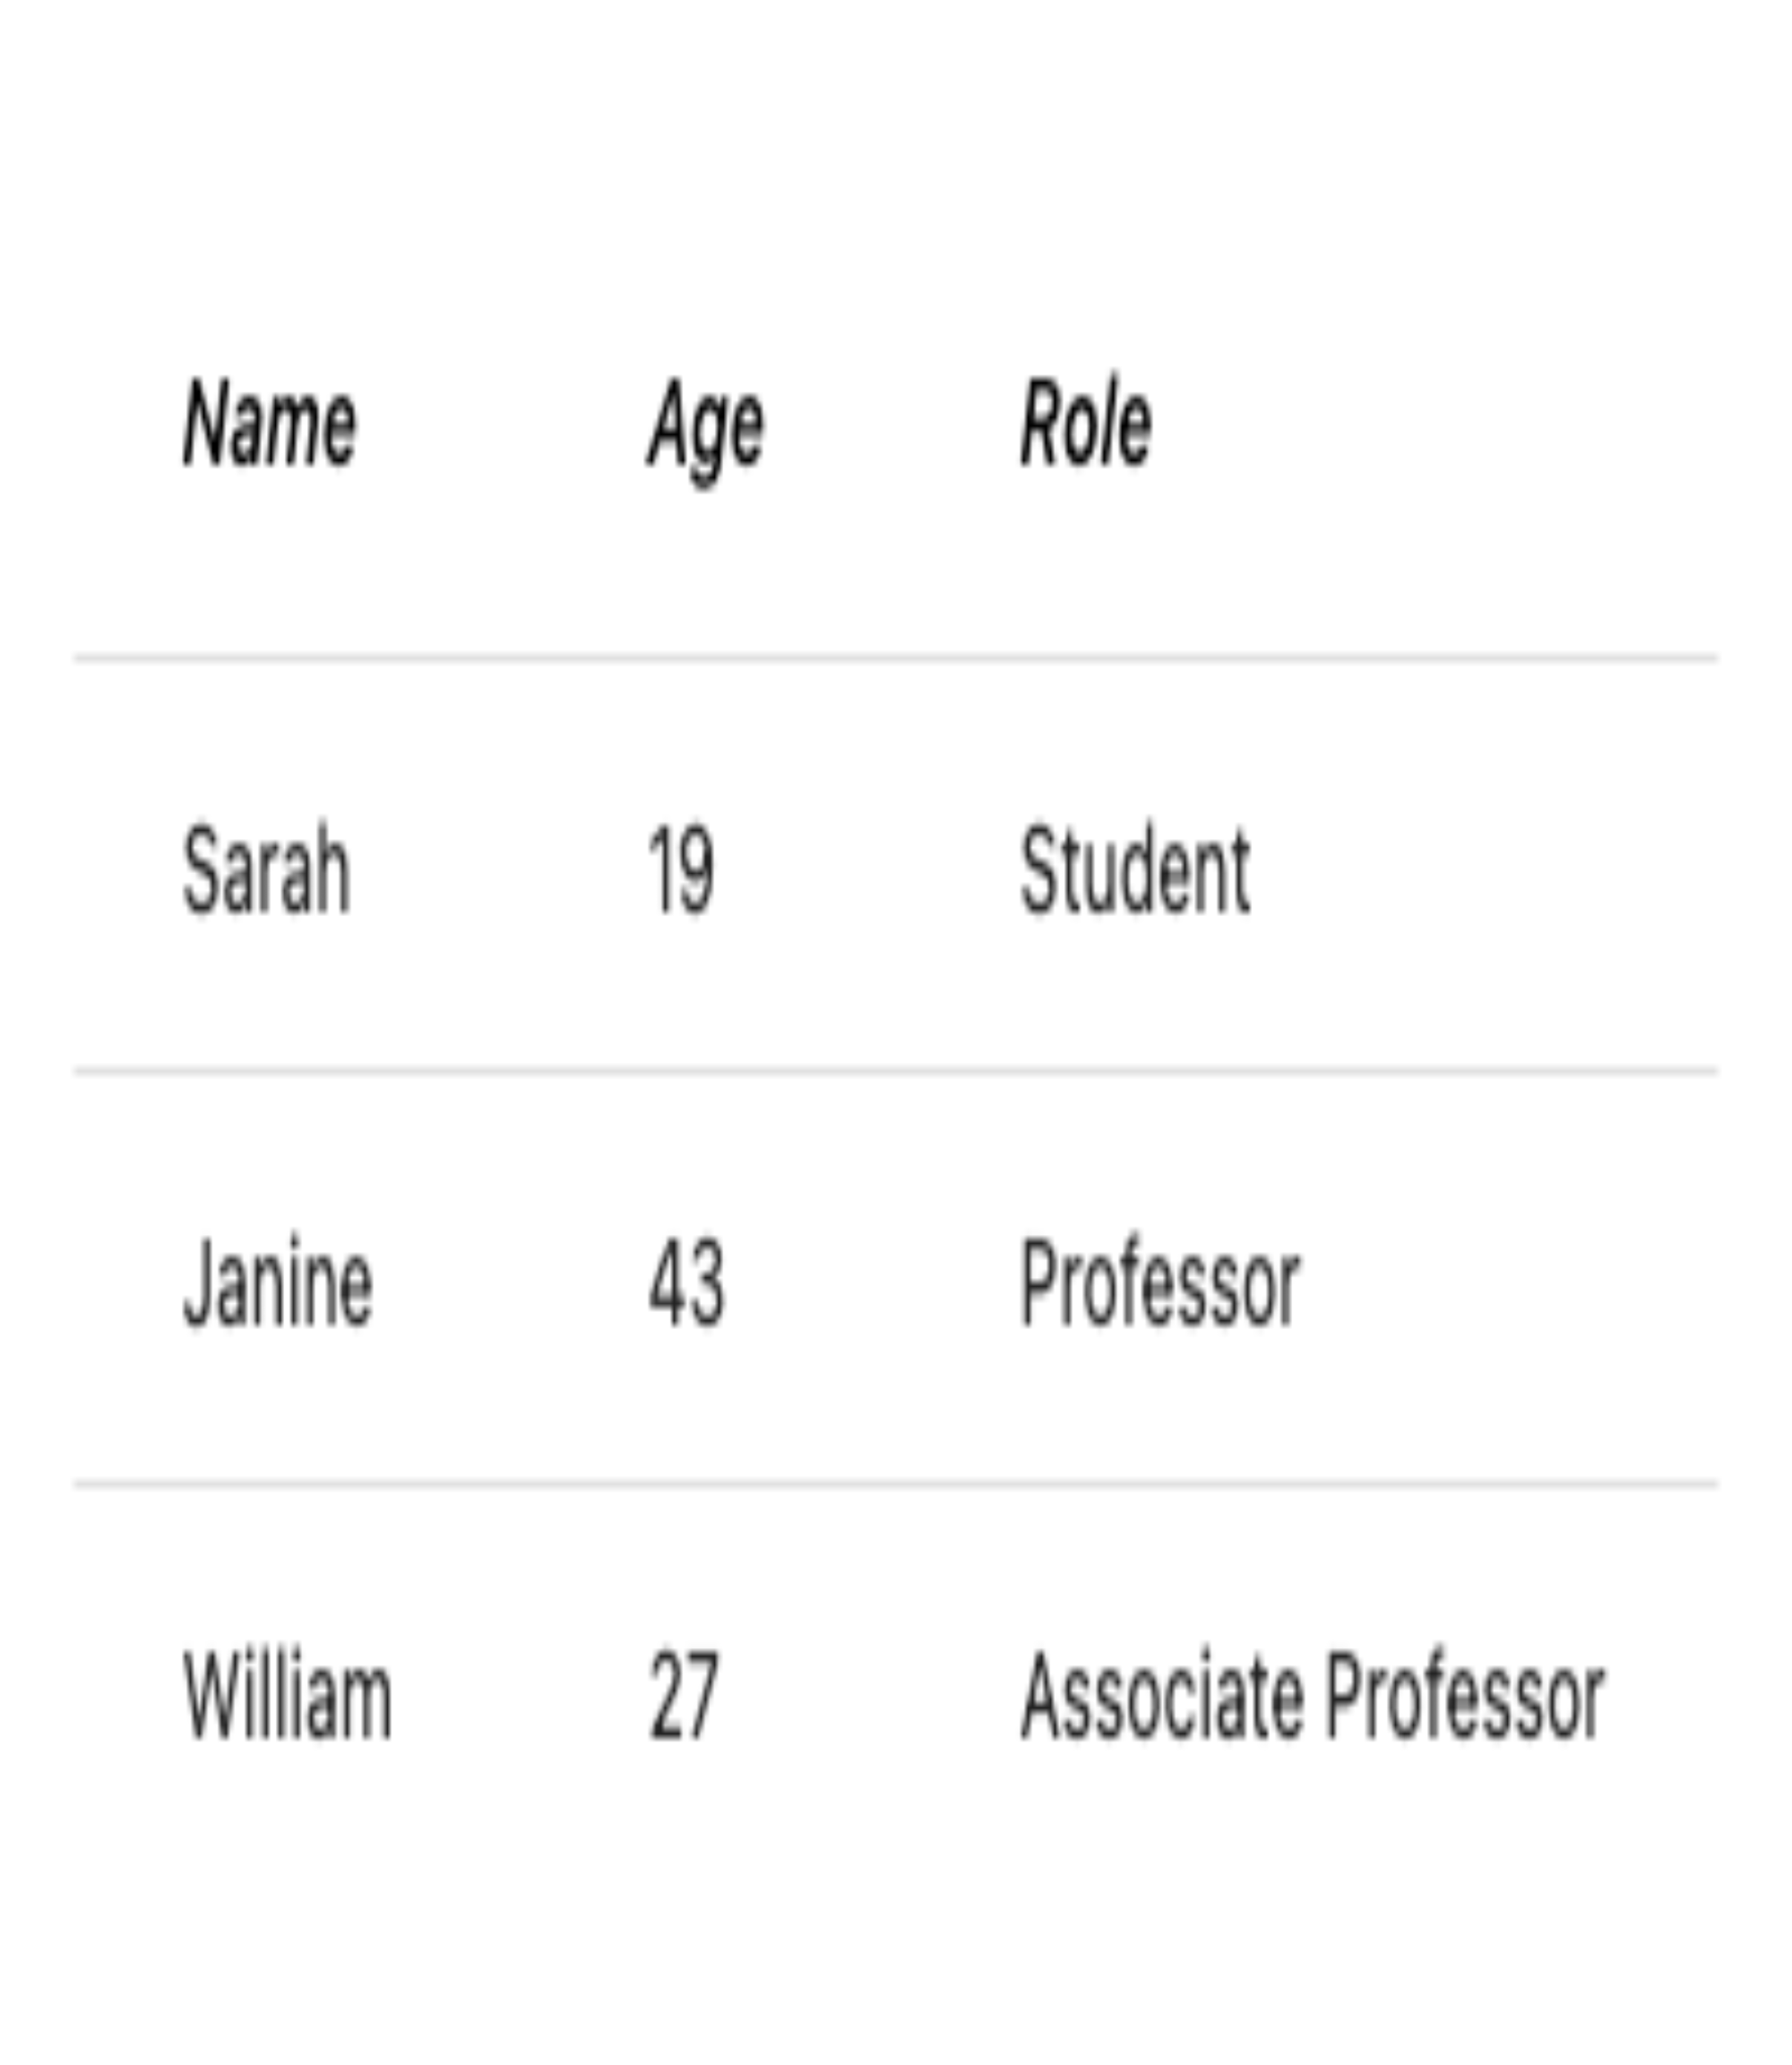

i1: 0


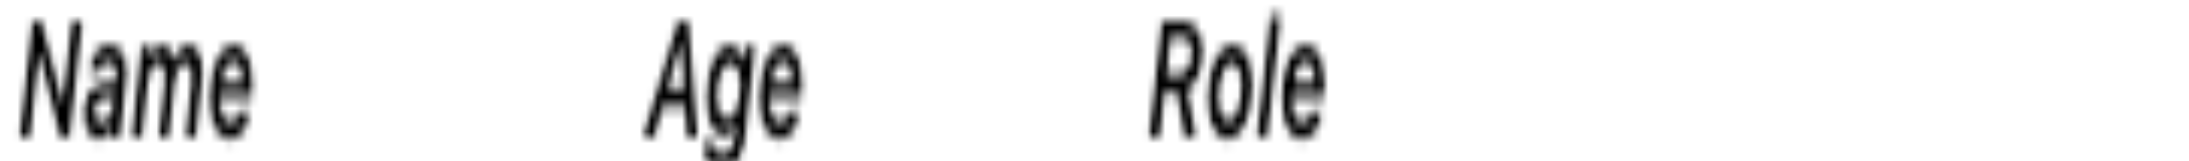

{'vals': [([[227, 489], [505, 489], [505, 650], [227, 650]], 'Name', 0.9995582699775696), ([[852, 491], [1052, 491], [1052, 674], [852, 674]], 'Age', 0.8921409873829533), ([[1358, 494], [1571, 494], [1571, 642], [1358, 642]], 'Role', 0.9986764788627625)], 'row_nos': 2, 'col_nos': 3}
{'vals': [([[227, 489], [505, 489], [505, 650], [227, 650]], 'Name', 0.9995582699775696), ([[852, 491], [1052, 491], [1052, 674], [852, 674]], 'Age', 0.8921409873829533), ([[1358, 494], [1571, 494], [1571, 642], [1358, 642]], 'Role', 0.9986764788627625), ([[226, 1091], [491, 1091], [491, 1248], [226, 1248]], 'Sarah', 0.999927708599232), ([[858, 1098], [974, 1098], [974, 1240], [858, 1240]], '19', 0.8285077214241028), ([[1355, 1089], [1709, 1089], [1709, 1248], [1355, 1248]], 'Student', 0.9972041295649249)], 'row_nos': 2, 'col_nos': 3}
@@
6
0
([[227, 489], [505, 489], [505, 650], [227, 650]], 'Name', 0.9995582699775696)
3
([[226, 1091], [491, 1091], [491, 1248], [226, 1248]], 'Sarah', 0.999927708599232)
1
([

In [ ]:
t2=get_tables("/content/data_table.png")

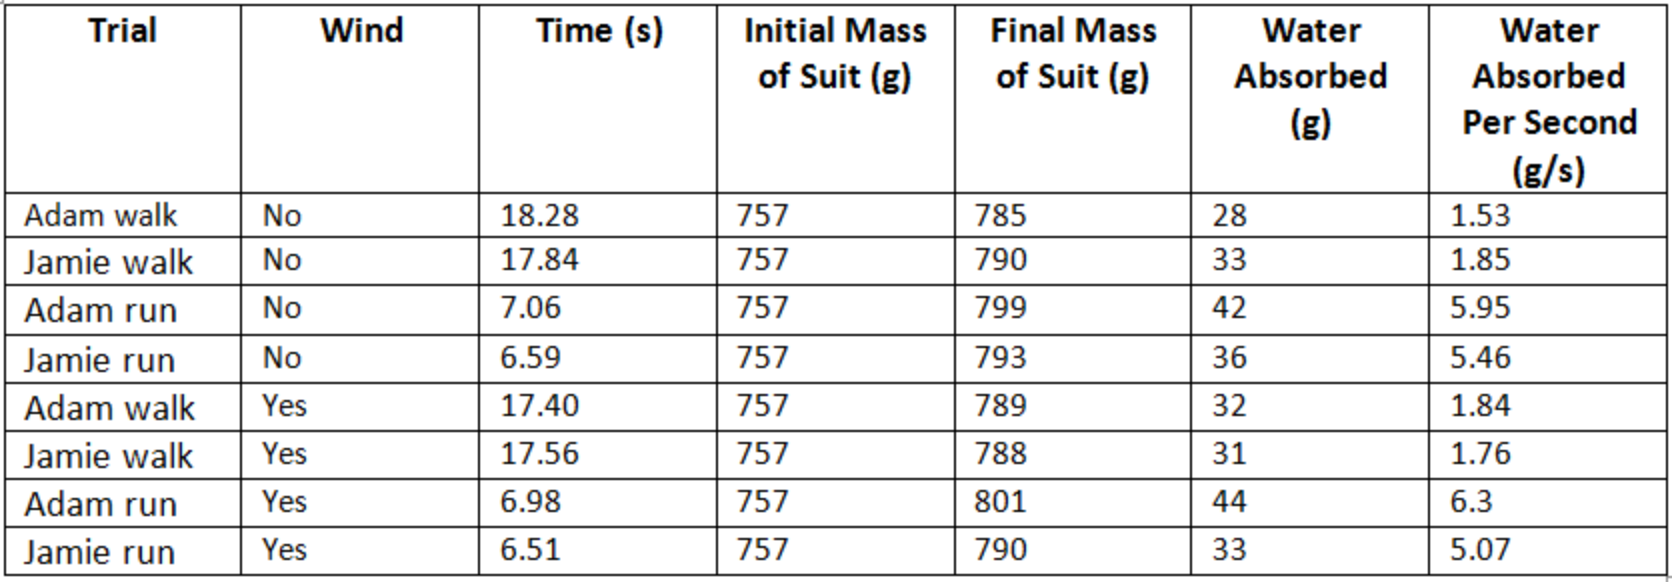

In [ ]:
img1=cv2.imread("/content/table_2.png")
img1 = cv2.resize(img1,(img1.shape[1]*2,img1.shape[0]*2))
cv2_imshow(img1)

In [ ]:
result = reader.readtext(img1,paragraph=True)

In [ ]:
result

[[[[83, 13], [163, 13], [163, 49], [83, 49]], 'Trial'],
 [[[319, 11], [409, 11], [409, 49], [319, 49]], 'Wind'],
 [[[531, 11], [669, 11], [669, 53], [531, 53]], 'Time (s)'],
 [[[739, 13], [933, 13], [933, 101], [739, 101]], 'Initial Mass of Suit (g)'],
 [[[987, 13], [1163, 13], [1163, 99], [987, 99]], 'Final Mass of Suit (g)'],
 [[[1231, 13], [1393, 13], [1393, 145], [1231, 145]], 'Water Absorbed (g)'],
 [[[1448, 13], [1643, 13], [1643, 324], [1448, 324]],
  'Water Absorbed Per Second (gls) 1.53 1.85 5.95'],
 [[[18, 197], [201, 197], [201, 571], [18, 571]],
  'Adam walk Jamie walk Adam run Jamie run Adam walk Jamie walk Adam run Jamie run'],
 [[[260, 200], [306, 200], [306, 324], [260, 324]], 'No No No'],
 [[[498, 200], [584, 200], [584, 324], [498, 324]], '18.28 17.84 7.06'],
 [[[734, 200], [792, 200], [792, 324], [734, 324]], '757 757 757'],
 [[[972, 200], [1032, 200], [1032, 324], [972, 324]], '785 790 799'],
 [[[1210, 200], [1252, 200], [1252, 324], [1210, 324]], '28 33 42'],
 [[[2

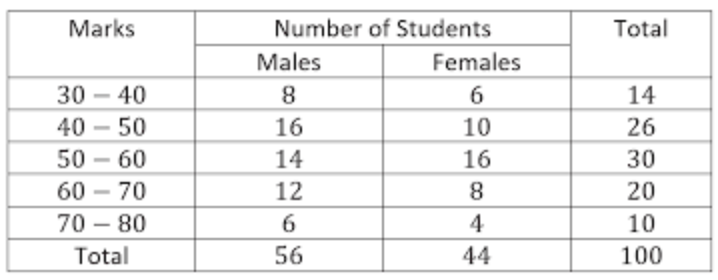

In [ ]:
img2=cv2.imread("/content/table.png")
img2 = cv2.resize(img2,(img2.shape[1]*2,img2.shape[0]*2))
cv2_imshow(img2)

In [ ]:
result = reader.readtext(img2,paragraph=True)

In [ ]:
result

[[[[66, 16], [138, 16], [138, 42], [66, 42]], 'Marks'],
 [[[254, 13], [524, 13], [524, 271], [254, 271]],
  'Number of Studerts Males Females 8 6 16 10 14 16 12 8 6 4 56'],
 [[[610, 16], [672, 16], [672, 42], [610, 42]], 'Total'],
 [[[52, 82], [150, 82], [150, 268], [52, 268]],
  '30 40 40 50 50 60 60 70 70 80 Total'],
 [[[616, 82], [666, 82], [666, 268], [616, 268]], '14 26 30 20 10 100']]